Root: -0.11864744768360097
      a         b     x_new      f(x_new)   epsilon_a
0  -0.2  0.100000  0.028108  3.884850e-03  811.553175
1  -0.2  0.028108 -0.033042  3.776789e-03  185.067155
2  -0.2 -0.033042 -0.076880  2.563348e-03   57.022045
3  -0.2 -0.076880 -0.100843  1.289553e-03   23.762476
4  -0.2 -0.100843 -0.111591  5.487041e-04    9.631862
5  -0.2 -0.111591 -0.115940  2.165892e-04    3.750617
6  -0.2 -0.115940 -0.117622  8.294223e-05    1.430101
7  -0.2 -0.117622 -0.118261  3.139280e-05    0.540467
8  -0.2 -0.118261 -0.118502  1.182914e-05    0.203543
9  -0.2 -0.118502 -0.118593  4.449875e-06    0.076553
10 -0.2 -0.118593 -0.118627  1.672893e-06    0.028777
11 -0.2 -0.118627 -0.118640  6.287609e-07    0.010816
12 -0.2 -0.118640 -0.118645  2.363002e-07    0.004065
13 -0.2 -0.118645 -0.118647  8.880307e-08    0.001528
14 -0.2 -0.118647 -0.118647  3.337233e-08    0.000574


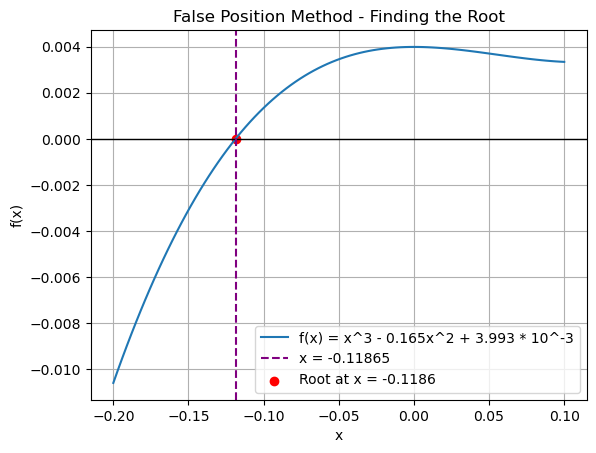

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 0.165 * x**2 + 3.993 * 10**-3

def false_position_method(f, a, b, tol=1e-5, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    
    iterations = []
    x_old = a 
    for i in range(max_iter):
        x_new = b - ((f(b) * (a - b)) / (f(a) - f(b)))
        
        if x_new != 0:
            epsilon_a = abs((x_new - x_old) / x_new) * 100
        else:
            epsilon_a = 0

        iterations.append([a, b, x_new, f(x_new), epsilon_a])
        
        if epsilon_a < tol:
            return x_new, iterations
        if f(a) * f(x_new) < 0:
            b = x_new
        else:
            a = x_new
        
        x_old = x_new  
    
    return x_new, iterations  


a, b = -0.2, 0.1  # f(-0.2) < 0 and f(0.1) > 0
tol = 0.001


root, iterations = false_position_method(f, a, b, tol)
print(f"Root: {root}")

df = pd.DataFrame(iterations, columns=["a", "b", "x_new", "f(x_new)", "epsilon_a"])
print(df)

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^3 - 0.165x^2 + 3.993 * 10^-3")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(root,color='purple',linestyle='--',label=f'x = {root:.5f}')
plt.scatter(root, f(root), color='red', label=f"Root at x = {root:.4f}")
plt.title("False Position Method - Finding the Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
